# Proprocessing dataset

In [44]:
with open('../dataset/train3_v4.csv') as f:
        print(f)

<_io.TextIOWrapper name='../dataset/train3_v4.csv' mode='r' encoding='cp950'>


In [45]:
import pandas as pd
import datasets
from datasets import load_dataset, Dataset, DatasetDict

Qdata_frame = pd.read_csv('../dataset/train3_v4.csv')
#Qdata_frame = pd.read_csv('../dataset/train3_v4.csv')


In [46]:
Qdata_frame['topic'] = Qdata_frame['topic'].apply(lambda x: x.strip().split(', '))

In [47]:
class_dict = {
'Algorithm Design': "Algorithm Design", 
'Communication Software and Protocols': "Networking and Internet Basics", 
'Computer System': "Computer System", 
'Data Manipulation and Analysis': "Data Manipulation and Analysis", 
'Data Organisation and Data Control': "Data Organisation and Data Control", 
'Database': "Spreadsheets and Databases", 
'Elementary Web Authoring': "Elementary Web Authoring", 
'Health and Ethical Issues': "Health and Ethical Issues", 
'Input and Output Devices': "Basic Machine Organisation", 
'Intellectual Property': "Intellectual Property", 
'Internet Services and Applications': "Internet Services and Applications", 
'Introduction to HTML': "Elementary Web Authoring", 
'Introduction to Information Processing': "Information Processing", 
'Multimedia Elements': "Multimedia Elements", 
'Number System': "Data Organisation and Data Control", 
'Problem- Formulation and Analysis': "Program Development", 
'Program Development': "Program Development", 
'Program Testing and Debugging': "Program Development", 
'Secondary Storage Devices': "Basic Machine Organisation", 
'Spreadsheet': "Spreadsheets and Databases", 
'System Software': "Computer System", 
'Networking and Internet Basics': 'Networking and Internet Basics',
'System Unit of a Computer System': "Basic Machine Organisation", 
'The Networking and Internet Basics': "Networking and Internet Basics", 
'Threats and Security on the Internet': "Threats and Security on the Internet", 
'Word Presentation': "Data Manipulation and Analysis"}

In [48]:
Qdata_frame['newTopic'] = Qdata_frame['topic'].apply(lambda topics: [class_dict[topic] for topic in topics])

In [49]:
# labelling
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Qdf = Qdata_frame.join(pd.DataFrame(mlb.fit_transform(Qdata_frame['newTopic']), columns=mlb.classes_))

In [50]:
# split the train, test, and validation data
import sklearn
from sklearn.model_selection import train_test_split

Qdf_train, Qdf_remain = train_test_split(Qdf, train_size=0.8)
Qdf_valid, Qdf_test = train_test_split(Qdf_remain, test_size=0.5)

In [51]:
Qdf_train.shape

(434, 20)

In [52]:
Qdf_test.shape

(55, 20)

In [53]:
Qdf_valid.shape

(54, 20)

In [54]:
# change to hugging face dataset type
trainDS = Dataset.from_pandas(Qdf_train)
validDS = Dataset.from_pandas(Qdf_valid)
testDS = Dataset.from_pandas(Qdf_test)
ds = DatasetDict()
ds["train"] = trainDS
ds["valid"] = validDS
ds["test"] = testDS

labels_original = [label for label in ds['train'].features.keys() if label not in ['Unnamed: 0', 'String', '__index_level_0__']]

In [55]:
Qdf[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values()

Elementary Web Authoring                13
Health and Ethical Issues               18
Intellectual Property                   18
Internet Services and Applications      19
Information Processing                  21
Computer System                         22
Threats and Security on the Internet    34
Data Manipulation and Analysis          37
Multimedia Elements                     39
Networking and Internet Basics          40
Algorithm Design                        48
Program Development                     48
Basic Machine Organisation              70
Spreadsheets and Databases              77
Data Organisation and Data Control      85
dtype: int64

In [56]:
Qdf_train[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values()

Elementary Web Authoring                13
Health and Ethical Issues               13
Intellectual Property                   14
Information Processing                  15
Internet Services and Applications      16
Computer System                         17
Data Manipulation and Analysis          25
Threats and Security on the Internet    28
Multimedia Elements                     31
Networking and Internet Basics          35
Program Development                     38
Algorithm Design                        40
Basic Machine Organisation              55
Spreadsheets and Databases              61
Data Organisation and Data Control      70
dtype: int64

<AxesSubplot: >

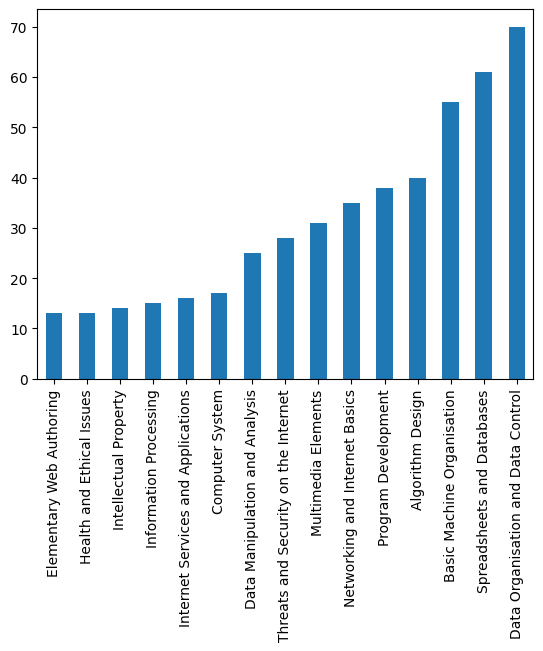

In [57]:
Qdf_train[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values().plot.bar()

<AxesSubplot: >

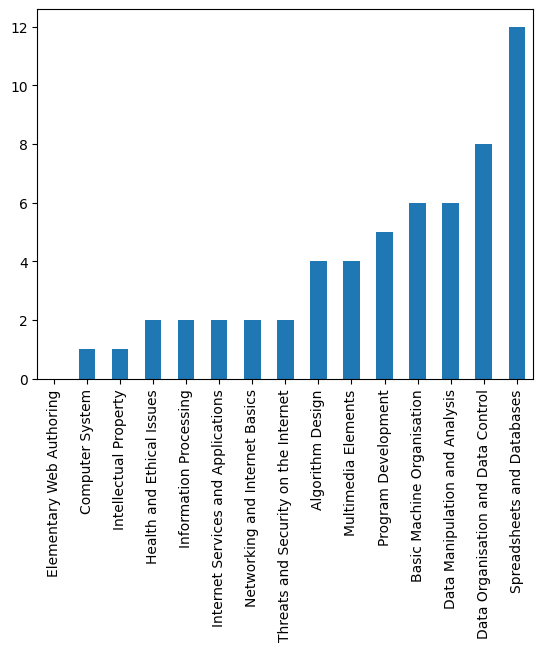

In [58]:
Qdf_valid[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values().plot.bar()

In [59]:
Qdf_valid[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values()

Elementary Web Authoring                 0
Computer System                          1
Intellectual Property                    1
Health and Ethical Issues                2
Information Processing                   2
Internet Services and Applications       2
Networking and Internet Basics           2
Threats and Security on the Internet     2
Algorithm Design                         4
Multimedia Elements                      4
Program Development                      5
Basic Machine Organisation               6
Data Manipulation and Analysis           6
Data Organisation and Data Control       8
Spreadsheets and Databases              12
dtype: int64

<AxesSubplot: >

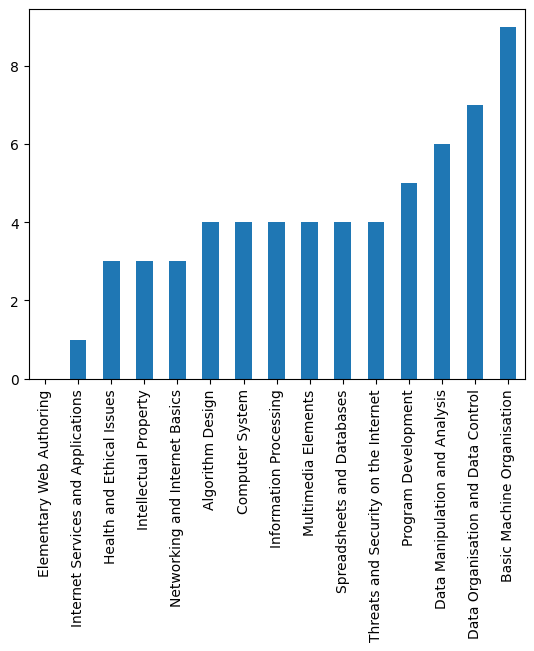

In [60]:
Qdf_test[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values().plot.bar()

In [61]:
Qdf_test[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values()

Elementary Web Authoring                0
Internet Services and Applications      1
Health and Ethical Issues               3
Intellectual Property                   3
Networking and Internet Basics          3
Algorithm Design                        4
Computer System                         4
Information Processing                  4
Multimedia Elements                     4
Spreadsheets and Databases              4
Threats and Security on the Internet    4
Program Development                     5
Data Manipulation and Analysis          6
Data Organisation and Data Control      7
Basic Machine Organisation              9
dtype: int64

In [62]:
#  clear not used columns
columns = ds.column_names
columns_toRemove = ["id", "type", "topic", "newTopic"]
new_ds = ds.remove_columns(columns_toRemove)
print(new_ds)


DatasetDict({
    train: Dataset({
        features: ['String', 'Algorithm Design', 'Basic Machine Organisation', 'Computer System', 'Data Manipulation and Analysis', 'Data Organisation and Data Control', 'Elementary Web Authoring', 'Health and Ethical Issues', 'Information Processing', 'Intellectual Property', 'Internet Services and Applications', 'Multimedia Elements', 'Networking and Internet Basics', 'Program Development', 'Spreadsheets and Databases', 'Threats and Security on the Internet', '__index_level_0__'],
        num_rows: 434
    })
    valid: Dataset({
        features: ['String', 'Algorithm Design', 'Basic Machine Organisation', 'Computer System', 'Data Manipulation and Analysis', 'Data Organisation and Data Control', 'Elementary Web Authoring', 'Health and Ethical Issues', 'Information Processing', 'Intellectual Property', 'Internet Services and Applications', 'Multimedia Elements', 'Networking and Internet Basics', 'Program Development', 'Spreadsheets and Databases', '

In [63]:
labels_original = [label for label in new_ds['train'].features.keys() if label not in ['Unnamed: 0', 'String', '__index_level_0__']]

In [64]:
labels_original

['Algorithm Design',
 'Basic Machine Organisation',
 'Computer System',
 'Data Manipulation and Analysis',
 'Data Organisation and Data Control',
 'Elementary Web Authoring',
 'Health and Ethical Issues',
 'Information Processing',
 'Intellectual Property',
 'Internet Services and Applications',
 'Multimedia Elements',
 'Networking and Internet Basics',
 'Program Development',
 'Spreadsheets and Databases',
 'Threats and Security on the Internet']

In [65]:
# extract the labels
labels_original
id2label = {idx:label for idx, label in enumerate(labels_original)}
label2id = {label:idx for idx, label in enumerate(labels_original)}

<AxesSubplot: >

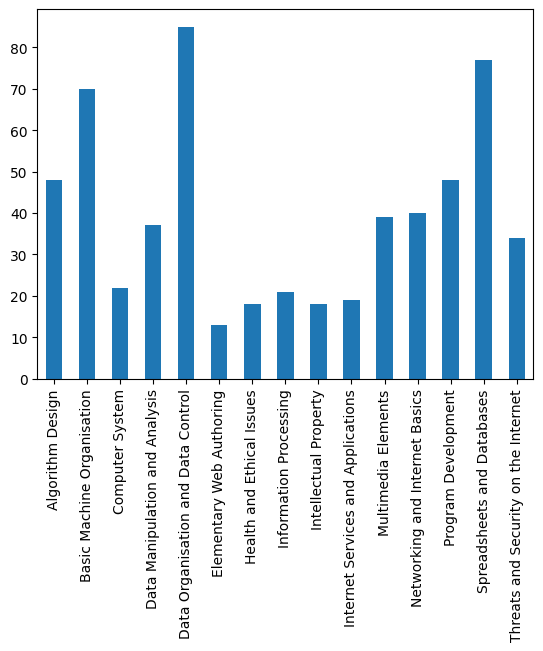

In [67]:
import matplotlib.pyplot as plt
Qdf[labels_original].sum().plot.bar()

In [ ]:
new_ds.save_to_disk('./encoded_data2_better')